In [115]:
from sklearn.tree import DecisionTreeRegressor
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
# Download latest version
path = kagglehub.dataset_download("ramamet4/app-store-apple-data-set-10k-apps")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/app-store-apple-data-set-10k-apps


In [116]:
dataset_folder = '/root/.cache/kagglehub/datasets/ramamet4/app-store-apple-data-set-10k-apps/versions/7'
for filename in os.listdir(dataset_folder):
    print(filename)


AppleStore.csv
appleStore_description.csv


In [100]:
file_path = os.path.join(dataset_folder,'AppleStore.csv')


In [101]:
# Membaca file CSV yang ditemukan
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dataset
print(df.head())


   Unnamed: 0         id                                         track_name  \
0           1  281656475                                    PAC-MAN Premium   
1           2  281796108                          Evernote - stay organized   
2           3  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3           4  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4           5  282935706                                              Bible   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD   3.99             21292                26   
1   158578688      USD   0.00            161065                26   
2   100524032      USD   0.00            188583              2822   
3   128512000      USD   0.00            262241               649   
4    92774400      USD   0.00            985920              5320   

   user_rating  user_rating_ver     ver cont_rating   prime_genre  \
0          4.0              4.5   6.3.5  

In [123]:
# Menampilkan nama-nama kolom dalam dataset
print(df.columns)

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')


In [109]:
df = df.dropna(subset=['size_bytes', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating'])

In [110]:
x = df[['size_bytes', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating']]
y = df['user_rating']

In [111]:
x

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating
0,100788224,3.99,21292,26,4.0
1,158578688,0.00,161065,26,4.0
2,100524032,0.00,188583,2822,3.5
3,128512000,0.00,262241,649,4.0
4,92774400,0.00,985920,5320,4.5
...,...,...,...,...,...
7192,126644224,0.00,142,75,4.5
7193,120760320,0.00,30,30,4.5
7194,111322112,1.99,15,0,4.5
7195,97235968,0.00,85,32,4.5


In [112]:
y

,user_rating
0,4.0
1,4.0
2,3.5
3,4.0
4,4.5
...,...
7192,4.5
7193,4.5
7194,4.5
7195,4.5


In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 42)

In [120]:
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [121]:
accuracy = dtree.score(x_test, y_test)
print(f"Akurasi model: {accuracy*100:.2f}%")

Akurasi model: 99.09%


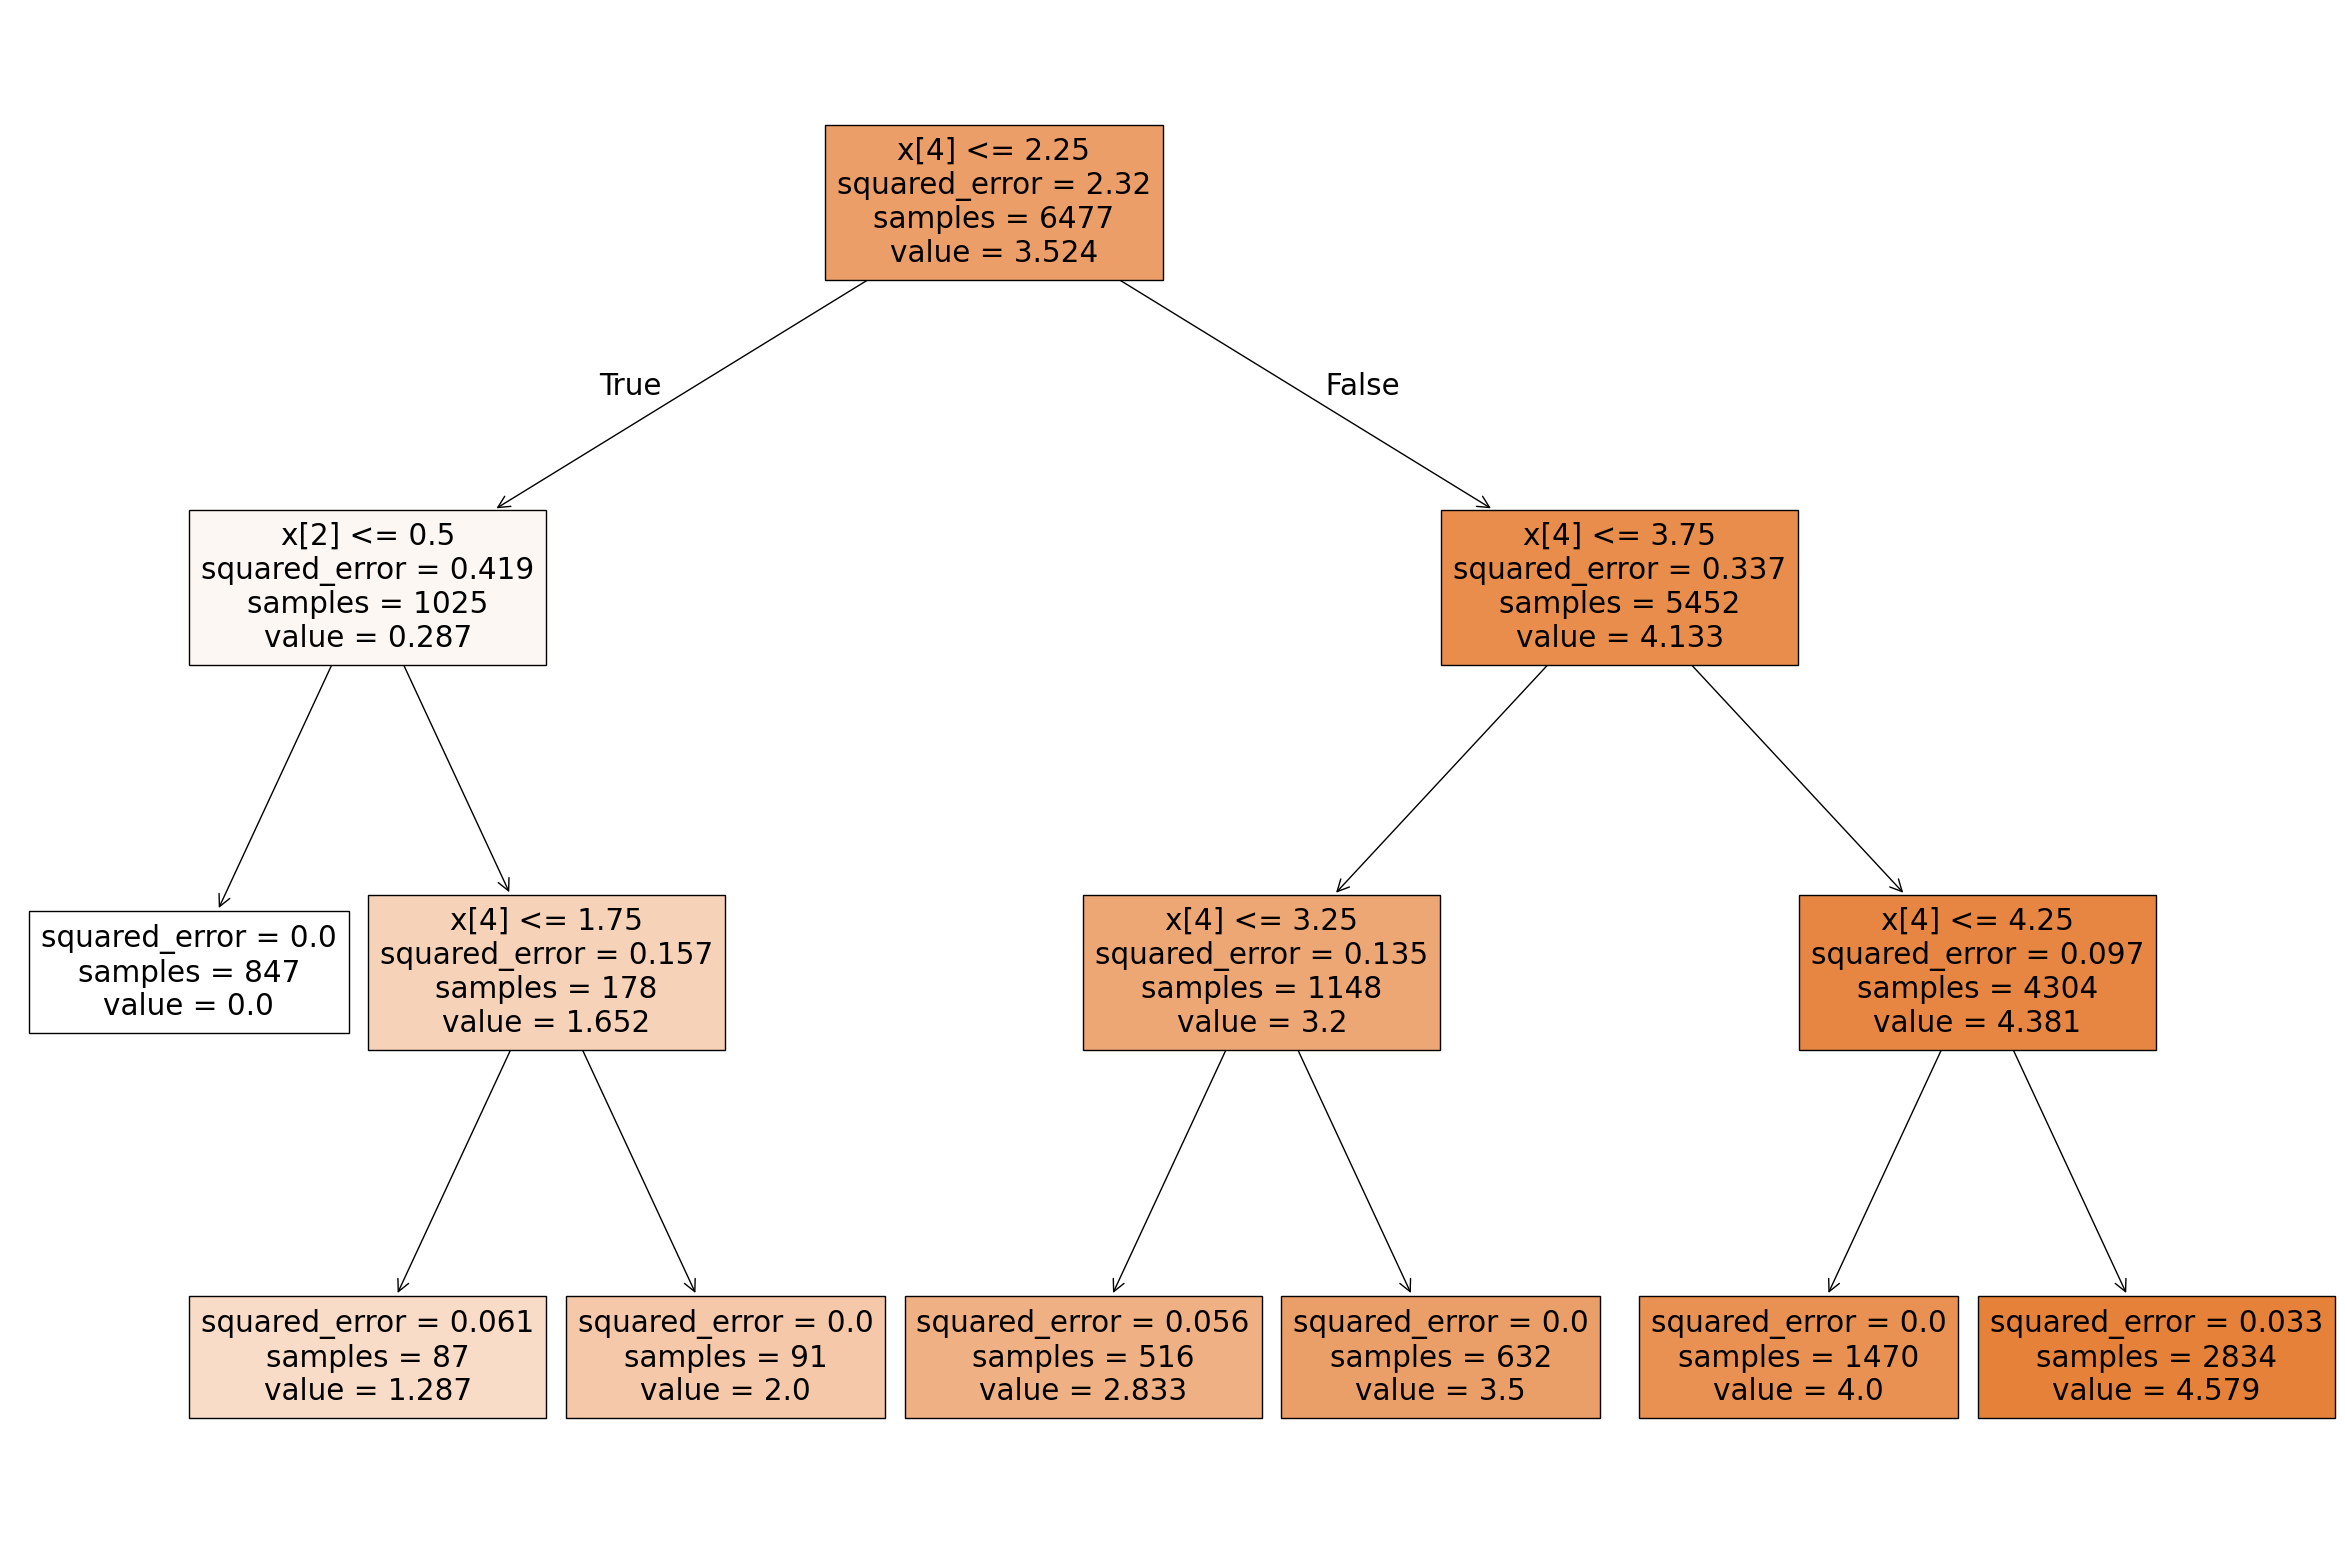

In [124]:
plt.figure(figsize=(30, 20))
plot_tree(dtree, filled=True)
plt.show()